# Mastercurve Model Comparison

Template to compare multiple models on mastercurve data (polystyrene).

**Data:** examples/data/pyRheo/polystyrene/master_curve_ps_oscillation_data.csv

In [1]:
# Google Colab compatibility - uncomment if running in Colab
# !pip install -q rheojax
# from google.colab import drive
# drive.mount('/content/drive')


## Setup and Imports

In [2]:
# Configure matplotlib for inline plotting in VS Code/Jupyter
%matplotlib inline

import warnings
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from rheojax.core.data import RheoData
from rheojax.core.jax_config import safe_import_jax, verify_float64
from rheojax.models.fractional_maxwell_model import FractionalMaxwellModel
from rheojax.models.generalized_maxwell import GeneralizedMaxwell
from rheojax.pipeline.base import Pipeline
from rheojax.transforms.mastercurve import Mastercurve

jax, jnp = safe_import_jax()
verify_float64()
np.set_printoptions(precision=4, suppress=True)
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11
warnings.filterwarnings('ignore', category=RuntimeWarning)

def r2_complex(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    ss_res = np.sum(np.abs(y_true - y_pred) ** 2)
    ss_tot = np.sum(np.abs(y_true - np.mean(y_true)) ** 2)
    return float(1 - ss_res / ss_tot)
import arviz as az


INFO:2025-12-07 17:22:47,661:jax._src.xla_bridge:808: Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: dlopen(libtpu.so, 0x0001): tried: 'libtpu.so' (no such file), '/System/Volumes/Preboot/Cryptexes/OSlibtpu.so' (no such file), '/usr/lib/libtpu.so' (no such file, not in dyld cache), 'libtpu.so' (no such file)


Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: dlopen(libtpu.so, 0x0001): tried: 'libtpu.so' (no such file), '/System/Volumes/Preboot/Cryptexes/OSlibtpu.so' (no such file), '/usr/lib/libtpu.so' (no such file, not in dyld cache), 'libtpu.so' (no such file)


Loading rheojax version 0.4.0


/Users/b80985/Projects/rheojax/.venv/lib/python3.13/site-packages/piblin_jax/__init__.py:28: UserWarning: GPU acceleration is only available on Linux with CUDA 12+. Using JAX in CPU mode.
  from . import backend, data, dataio, transform


Found 'auto' as default backend, checking available backends


Matplotlib is available, defining as default backend


arviz_base available, exposing its functions as part of arviz.preview


arviz_stats available, exposing its functions as part of arviz.preview


arviz_plots available, exposing its functions as part of arviz.preview


## Load mastercurve (polystyrene)

In [3]:
DATA_DIR = Path.cwd().parent / 'data' / 'pyRheo' / 'polystyrene'
df = pd.read_csv(DATA_DIR / 'master_curve_ps_oscillation_data.csv')
omega = df['Angular Frequency'].to_numpy()
Gp = df['Storage Modulus'].to_numpy()
Gpp = df['Loss Modulus'].to_numpy()
G_star = Gp + 1j*Gpp


## Compare candidate models

In [4]:
candidates = [
    ('GM-3', GeneralizedMaxwell(n_modes=3, modulus_type='tensile')),
    ('GM-5', GeneralizedMaxwell(n_modes=5, modulus_type='tensile')),
    ('GM-7', GeneralizedMaxwell(n_modes=7, modulus_type='tensile')),
    ('FracMax', FractionalMaxwellModel()),
]
rows = []
for name, model in candidates:
    try:
        model.fit(omega, G_star, test_mode='oscillation', use_log_residuals=True)
        pred = model.predict(omega)
        if pred.ndim == 2:
            pred = pred[:,0] + 1j*pred[:,1]
        r2 = r2_complex(G_star, pred)
        rows.append({'model': name, 'r2': r2})
    except Exception as exc:
        rows.append({'model': name, 'r2': np.nan, 'error': str(exc)})

pd.DataFrame(rows)


Starting least squares optimization | {'method': 'trf', 'n_params': 7, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 1.319201s


Convergence: reason=`ftol` termination condition is satisfied. | iterations=64 | final_cost=3.547677e+11 | time=1.319s | final_gradient_norm=248598245.35240754


Starting least squares optimization | {'method': 'trf', 'n_params': 7, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.326535s


Convergence: reason=`ftol` termination condition is satisfied. | iterations=64 | final_cost=3.547677e+11 | time=0.327s | final_gradient_norm=248598245.35240754


Starting least squares optimization | {'method': 'trf', 'n_params': 5, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.590048s


Convergence: reason=`ftol` termination condition is satisfied. | iterations=19 | final_cost=9.735034e+11 | time=0.590s | final_gradient_norm=1.5340190487145265e+19


Element minimization: early termination at n_modes=2 (R²=0.982707 < threshold=0.990547)


Starting least squares optimization | {'method': 'trf', 'n_params': 11, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.973732s


Convergence: reason=`xtol` termination condition is satisfied. | iterations=13 | final_cost=1.068466e+13 | time=0.974s | final_gradient_norm=3.356411894713626e+23


Starting least squares optimization | {'method': 'trf', 'n_params': 11, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.290525s


Convergence: reason=`xtol` termination condition is satisfied. | iterations=13 | final_cost=1.068466e+13 | time=0.291s | final_gradient_norm=3.356411894713626e+23


Starting least squares optimization | {'method': 'trf', 'n_params': 9, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.872243s


Convergence: reason=`xtol` termination condition is satisfied. | iterations=1 | final_cost=1.118755e+13 | time=0.872s | final_gradient_norm=3.56511362901958e+23


Starting least squares optimization | {'method': 'trf', 'n_params': 7, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.185745s


Convergence: reason=`xtol` termination condition is satisfied. | iterations=1 | final_cost=1.261868e+13 | time=0.186s | final_gradient_norm=3.930836899585671e+23


Starting least squares optimization | {'method': 'trf', 'n_params': 5, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.534635s


Convergence: reason=`ftol` termination condition is satisfied. | iterations=28 | final_cost=9.735038e+11 | time=0.535s | final_gradient_norm=801779923.3537974


Starting least squares optimization | {'method': 'trf', 'n_params': 3, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.836685s


Convergence: reason=`ftol` termination condition is satisfied. | iterations=12 | final_cost=3.688319e+12 | time=0.837s | final_gradient_norm=1436000963.6077752


Element minimization: reducing from 5 to 2 modes


Starting least squares optimization | {'method': 'trf', 'n_params': 15, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 1.121988s


Convergence: reason=`xtol` termination condition is satisfied. | iterations=31 | final_cost=2.370154e+10 | time=1.122s | final_gradient_norm=2.5480554071252746e+20


Starting least squares optimization | {'method': 'trf', 'n_params': 15, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.396991s


Convergence: reason=`xtol` termination condition is satisfied. | iterations=31 | final_cost=2.370154e+10 | time=0.397s | final_gradient_norm=2.5480554071252746e+20


Starting least squares optimization | {'method': 'trf', 'n_params': 13, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 1.005919s


Convergence: reason=`xtol` termination condition is satisfied. | iterations=3 | final_cost=4.316224e+10 | time=1.006s | final_gradient_norm=9.11507187566722e+17


Element minimization: early termination at n_modes=6 (R²=0.999233 < threshold=0.999368)


Starting least squares optimization | {'method': 'trf', 'n_params': 4, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 1.090445s


Convergence: reason=`ftol` termination condition is satisfied. | iterations=30 | final_cost=7.099389e+00 | time=1.090s | final_gradient_norm=0.0065040219009454515


,model,r2
0,GM-3,0.993697
1,GM-5,0.982704
2,GM-7,0.999579
3,FracMax,-43733.637158


## Visualize top 2

Starting least squares optimization | {'method': 'trf', 'n_params': 15, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.386927s


Convergence: reason=`xtol` termination condition is satisfied. | iterations=31 | final_cost=2.370154e+10 | time=0.387s | final_gradient_norm=2.5480554071252746e+20


Starting least squares optimization | {'method': 'trf', 'n_params': 15, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.390169s


Convergence: reason=`xtol` termination condition is satisfied. | iterations=31 | final_cost=2.370154e+10 | time=0.390s | final_gradient_norm=2.5480554071252746e+20


Starting least squares optimization | {'method': 'trf', 'n_params': 13, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.272675s


Convergence: reason=`xtol` termination condition is satisfied. | iterations=3 | final_cost=4.316224e+10 | time=0.273s | final_gradient_norm=9.11507187566722e+17


Element minimization: early termination at n_modes=6 (R²=0.999233 < threshold=0.999368)


Starting least squares optimization | {'method': 'trf', 'n_params': 7, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.343272s


Convergence: reason=`ftol` termination condition is satisfied. | iterations=64 | final_cost=3.547677e+11 | time=0.343s | final_gradient_norm=248598245.35240754


Starting least squares optimization | {'method': 'trf', 'n_params': 7, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.350569s


Convergence: reason=`ftol` termination condition is satisfied. | iterations=64 | final_cost=3.547677e+11 | time=0.351s | final_gradient_norm=248598245.35240754


Starting least squares optimization | {'method': 'trf', 'n_params': 5, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.207574s


Convergence: reason=`ftol` termination condition is satisfied. | iterations=19 | final_cost=9.735034e+11 | time=0.208s | final_gradient_norm=1.5340190487145265e+19


Element minimization: early termination at n_modes=2 (R²=0.982707 < threshold=0.990547)


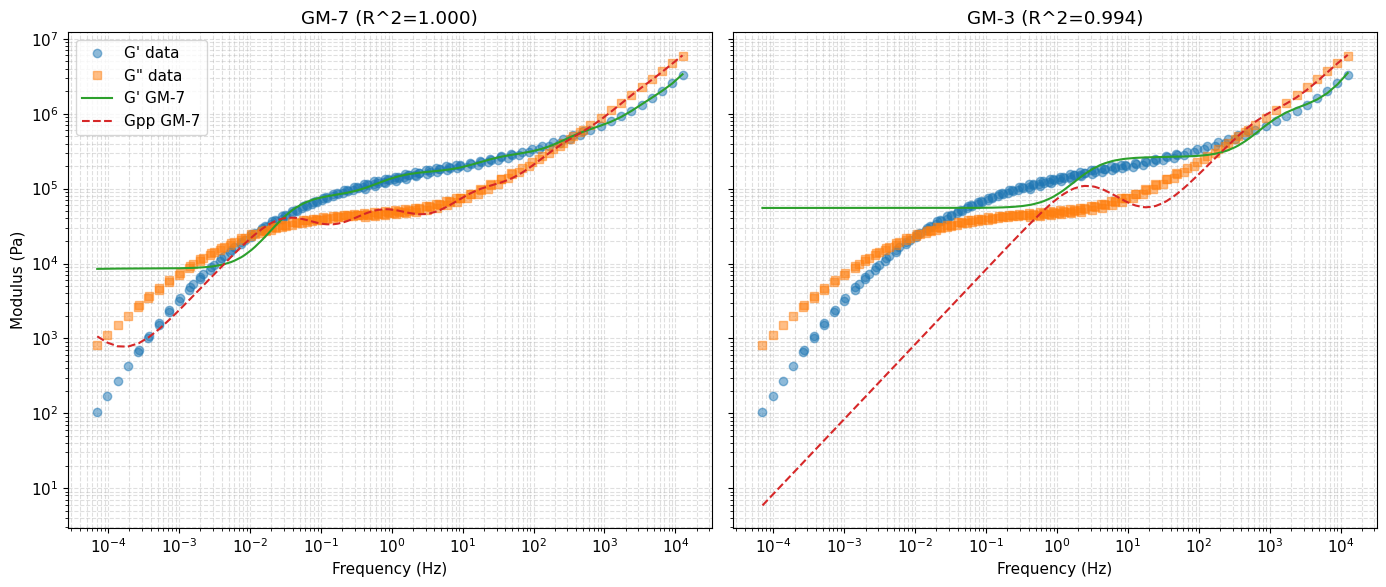

In [5]:
top2 = sorted([r for r in rows if np.isfinite(r['r2'])], key=lambda x: x['r2'], reverse=True)[:2]
freq_hz = omega/(2*np.pi)
fig, axes = plt.subplots(1, len(top2), figsize=(14,6), sharey=True)
for ax, rec in zip(axes, top2):
    model = dict(candidates)[rec['model']]
    model.fit(omega, G_star, test_mode='oscillation', use_log_residuals=True)
    pred = model.predict(omega)
    if pred.ndim == 2:
        pred = pred[:,0] + 1j*pred[:,1]
    ax.loglog(freq_hz, np.real(G_star), 'o', label="G' data", alpha=0.5)
    ax.loglog(freq_hz, np.imag(G_star), 's', label='G" data', alpha=0.5)
    ax.loglog(freq_hz, np.real(pred), '-', label=f"G' {rec['model']}")
    ax.loglog(freq_hz, np.imag(pred), '--', label=f"Gpp {rec['model']}")
    ax.set_title(f"{rec['model']} (R^2={rec['r2']:.3f})")
    ax.grid(True, which='both', ls='--', alpha=0.4)
for ax in axes:
    ax.set_xlabel('Frequency (Hz)')
axes[0].set_ylabel('Modulus (Pa)')
axes[0].legend()
plt.tight_layout()
display(fig)
plt.close(fig)

## Bayesian workflow (NLSQ → best model → NUTS diagnostics)

Starting least squares optimization | {'method': 'trf', 'n_params': 7, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.352431s


Convergence: reason=`ftol` termination condition is satisfied. | iterations=64 | final_cost=3.547677e+11 | time=0.352s | final_gradient_norm=248598245.35240754


Starting least squares optimization | {'method': 'trf', 'n_params': 7, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.353977s


Convergence: reason=`ftol` termination condition is satisfied. | iterations=64 | final_cost=3.547677e+11 | time=0.354s | final_gradient_norm=248598245.35240754


Starting least squares optimization | {'method': 'trf', 'n_params': 5, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.209772s


Convergence: reason=`ftol` termination condition is satisfied. | iterations=19 | final_cost=9.735034e+11 | time=0.210s | final_gradient_norm=1.5340190487145265e+19


Element minimization: early termination at n_modes=2 (R²=0.982707 < threshold=0.990547)


Starting least squares optimization | {'method': 'trf', 'n_params': 5, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.264619s


Convergence: reason=`ftol` termination condition is satisfied. | iterations=47 | final_cost=9.735035e+11 | time=0.265s | final_gradient_norm=692647729.9577972


Starting least squares optimization | {'method': 'trf', 'n_params': 5, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.264324s


Convergence: reason=`ftol` termination condition is satisfied. | iterations=47 | final_cost=9.735035e+11 | time=0.264s | final_gradient_norm=692647729.9577972


Starting least squares optimization | {'method': 'trf', 'n_params': 3, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.178288s


Convergence: reason=`ftol` termination condition is satisfied. | iterations=6 | final_cost=3.688319e+12 | time=0.178s | final_gradient_norm=6.281065605268301e+19


Element minimization: early termination at n_modes=1 (R²=0.934481 < threshold=0.974060)


Starting least squares optimization | {'method': 'trf', 'n_params': 15, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.387035s


Convergence: reason=`xtol` termination condition is satisfied. | iterations=31 | final_cost=2.370154e+10 | time=0.387s | final_gradient_norm=2.5480554071252746e+20


Starting least squares optimization | {'method': 'trf', 'n_params': 15, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.391467s


Convergence: reason=`xtol` termination condition is satisfied. | iterations=31 | final_cost=2.370154e+10 | time=0.391s | final_gradient_norm=2.5480554071252746e+20


Starting least squares optimization | {'method': 'trf', 'n_params': 13, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.269704s


Convergence: reason=`xtol` termination condition is satisfied. | iterations=3 | final_cost=4.316224e+10 | time=0.270s | final_gradient_norm=9.11507187566722e+17


Element minimization: early termination at n_modes=6 (R²=0.999233 < threshold=0.999368)


Starting least squares optimization | {'method': 'trf', 'n_params': 4, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.347175s


Convergence: reason=`ftol` termination condition is satisfied. | iterations=30 | final_cost=7.099389e+00 | time=0.347s | final_gradient_norm=0.0065040219009454515


Model ranking (R²): [('GM-7', 1.0), ('GM-3', 0.994), ('GM-5', 0.983), ('FracMax', 0.285)]


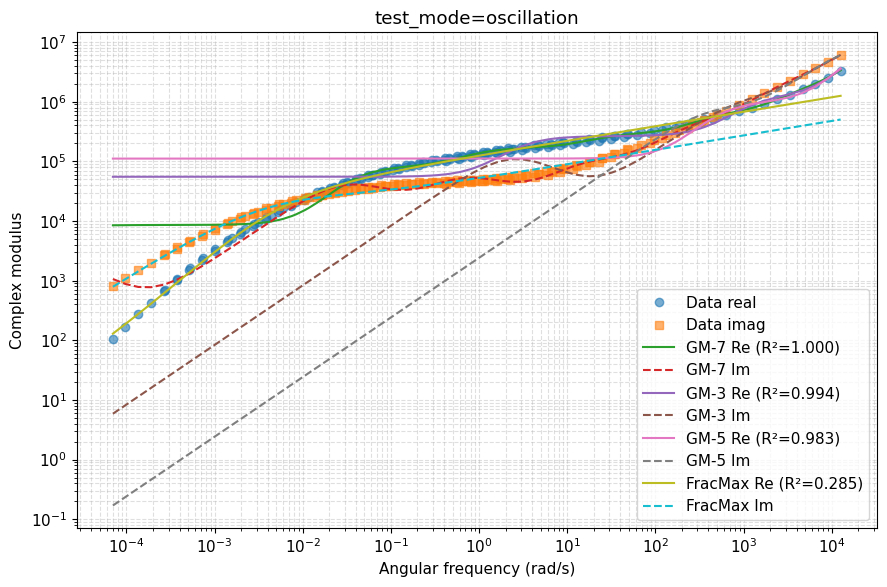

  0%|          | 0/4000 [00:00<?, ?it/s]

warmup:   0%|          | 1/4000 [00:01<1:13:57,  1.11s/it, 1 steps of size 2.34e+00. acc. prob=0.00]

warmup:   0%|          | 20/4000 [00:01<02:58, 22.30it/s, 1023 steps of size 1.14e-02. acc. prob=0.69]

warmup:   1%|          | 31/4000 [00:01<02:00, 33.04it/s, 1023 steps of size 9.03e-03. acc. prob=0.72]

warmup:   1%|          | 41/4000 [00:01<01:35, 41.45it/s, 1023 steps of size 1.19e-02. acc. prob=0.73]

warmup:   1%|▏         | 50/4000 [00:01<01:20, 49.05it/s, 1023 steps of size 9.13e-03. acc. prob=0.74]

warmup:   2%|▏         | 62/4000 [00:01<01:02, 62.95it/s, 511 steps of size 1.38e-02. acc. prob=0.75] 

warmup:   2%|▏         | 72/4000 [00:01<00:59, 65.74it/s, 511 steps of size 1.57e-02. acc. prob=0.76]

warmup:   2%|▏         | 81/4000 [00:01<00:57, 68.42it/s, 511 steps of size 8.76e-03. acc. prob=0.76]

warmup:   2%|▏         | 90/4000 [00:02<00:54, 71.51it/s, 1023 steps of size 8.56e-03. acc. prob=0.76]

warmup:   2%|▎         | 100/4000 [00:02<00:52, 74.97it/s, 1023 steps of size 8.23e-03. acc. prob=0.76]

warmup:   4%|▍         | 159/4000 [00:02<00:18, 204.24it/s, 127 steps of size 9.60e-02. acc. prob=0.77]

warmup:   6%|▋         | 254/4000 [00:02<00:09, 399.68it/s, 127 steps of size 6.22e-02. acc. prob=0.78]

warmup:   9%|▉         | 351/4000 [00:02<00:06, 554.24it/s, 31 steps of size 1.89e-01. acc. prob=0.78] 

warmup:  12%|█▏        | 460/4000 [00:02<00:05, 700.08it/s, 127 steps of size 6.84e-02. acc. prob=0.78]

warmup:  14%|█▍        | 563/4000 [00:02<00:04, 793.52it/s, 15 steps of size 1.76e-01. acc. prob=0.79] 

warmup:  17%|█▋        | 676/4000 [00:02<00:03, 889.98it/s, 15 steps of size 1.94e-01. acc. prob=0.79]

warmup:  20%|█▉        | 788/4000 [00:02<00:03, 955.49it/s, 15 steps of size 1.03e-01. acc. prob=0.79]

warmup:  22%|██▎       | 900/4000 [00:02<00:03, 1002.35it/s, 15 steps of size 2.67e-01. acc. prob=0.79]

sample:  25%|██▌       | 1002/4000 [00:03<00:03, 995.03it/s, 15 steps of size 1.46e-01. acc. prob=0.97]

sample:  28%|██▊       | 1105/4000 [00:03<00:02, 1005.27it/s, 31 steps of size 1.46e-01. acc. prob=0.94]

sample:  30%|███       | 1207/4000 [00:03<00:02, 992.51it/s, 31 steps of size 1.46e-01. acc. prob=0.94] 

sample:  33%|███▎      | 1307/4000 [00:03<00:02, 983.65it/s, 31 steps of size 1.46e-01. acc. prob=0.93]

sample:  35%|███▌      | 1406/4000 [00:03<00:02, 974.57it/s, 31 steps of size 1.46e-01. acc. prob=0.93]

sample:  38%|███▊      | 1505/4000 [00:03<00:02, 978.41it/s, 31 steps of size 1.46e-01. acc. prob=0.93]

sample:  40%|████      | 1604/4000 [00:03<00:02, 965.47it/s, 31 steps of size 1.46e-01. acc. prob=0.93]

sample:  43%|████▎     | 1704/4000 [00:03<00:02, 973.84it/s, 31 steps of size 1.46e-01. acc. prob=0.93]

sample:  45%|████▌     | 1802/4000 [00:03<00:02, 972.46it/s, 15 steps of size 1.46e-01. acc. prob=0.93]

sample:  48%|████▊     | 1900/4000 [00:04<00:02, 967.97it/s, 31 steps of size 1.46e-01. acc. prob=0.93]

sample:  50%|████▉     | 1997/4000 [00:04<00:02, 960.05it/s, 31 steps of size 1.46e-01. acc. prob=0.93]

sample:  52%|█████▏    | 2094/4000 [00:04<00:01, 962.34it/s, 31 steps of size 1.46e-01. acc. prob=0.93]

sample:  55%|█████▍    | 2191/4000 [00:04<00:01, 963.84it/s, 31 steps of size 1.46e-01. acc. prob=0.93]

sample:  57%|█████▋    | 2293/4000 [00:04<00:01, 977.43it/s, 31 steps of size 1.46e-01. acc. prob=0.93]

sample:  60%|█████▉    | 2391/4000 [00:04<00:01, 965.95it/s, 31 steps of size 1.46e-01. acc. prob=0.93]

sample:  62%|██████▏   | 2488/4000 [00:04<00:01, 966.93it/s, 31 steps of size 1.46e-01. acc. prob=0.93]

sample:  65%|██████▍   | 2585/4000 [00:04<00:01, 963.50it/s, 31 steps of size 1.46e-01. acc. prob=0.93]

sample:  67%|██████▋   | 2686/4000 [00:04<00:01, 976.36it/s, 31 steps of size 1.46e-01. acc. prob=0.93]

sample:  70%|██████▉   | 2784/4000 [00:04<00:01, 969.10it/s, 31 steps of size 1.46e-01. acc. prob=0.93]

sample:  72%|███████▏  | 2885/4000 [00:05<00:01, 981.22it/s, 15 steps of size 1.46e-01. acc. prob=0.92]

sample:  75%|███████▌  | 3011/4000 [00:05<00:00, 1064.04it/s, 34 steps of size 1.46e-01. acc. prob=0.87]

sample:  78%|███████▊  | 3118/4000 [00:05<00:00, 1029.50it/s, 31 steps of size 1.46e-01. acc. prob=0.88]

sample:  81%|████████  | 3222/4000 [00:05<00:00, 1018.30it/s, 31 steps of size 1.46e-01. acc. prob=0.88]

sample:  83%|████████▎ | 3326/4000 [00:05<00:00, 1023.38it/s, 31 steps of size 1.46e-01. acc. prob=0.87]

sample:  86%|████████▌ | 3429/4000 [00:05<00:00, 1003.84it/s, 31 steps of size 1.46e-01. acc. prob=0.87]

sample:  88%|████████▊ | 3530/4000 [00:05<00:00, 993.58it/s, 31 steps of size 1.46e-01. acc. prob=0.88] 

sample:  91%|█████████ | 3630/4000 [00:05<00:00, 980.85it/s, 31 steps of size 1.46e-01. acc. prob=0.88]

sample:  93%|█████████▎| 3729/4000 [00:05<00:00, 970.73it/s, 31 steps of size 1.46e-01. acc. prob=0.88]

sample:  96%|█████████▌| 3828/4000 [00:05<00:00, 974.18it/s, 31 steps of size 1.46e-01. acc. prob=0.88]

sample:  98%|█████████▊| 3926/4000 [00:06<00:00, 975.57it/s, 15 steps of size 1.46e-01. acc. prob=0.88]

sample: 100%|██████████| 4000/4000 [00:06<00:00, 650.72it/s, 31 steps of size 1.46e-01. acc. prob=0.88]

  0%|          | 0/4000 [00:00<?, ?it/s]

warmup:   1%|          | 23/4000 [00:00<00:17, 223.08it/s, 511 steps of size 1.20e-02. acc. prob=0.70]

warmup:   1%|          | 46/4000 [00:00<00:37, 105.85it/s, 7 steps of size 3.03e-03. acc. prob=0.73]  

warmup:   2%|▏         | 60/4000 [00:00<00:37, 104.89it/s, 23 steps of size 3.61e-03. acc. prob=0.74]

warmup:   2%|▏         | 73/4000 [00:00<00:40, 95.99it/s, 511 steps of size 1.49e-02. acc. prob=0.76]

warmup:   2%|▏         | 84/4000 [00:00<00:41, 95.20it/s, 511 steps of size 1.18e-02. acc. prob=0.76]

warmup:   2%|▏         | 95/4000 [00:00<00:42, 92.84it/s, 511 steps of size 1.41e-02. acc. prob=0.76]

warmup:   3%|▎         | 139/4000 [00:01<00:21, 180.01it/s, 31 steps of size 1.45e-01. acc. prob=0.77]

warmup:   5%|▌         | 215/4000 [00:01<00:11, 332.92it/s, 31 steps of size 1.43e-01. acc. prob=0.78]

warmup:   8%|▊         | 303/4000 [00:01<00:07, 481.64it/s, 31 steps of size 1.93e-01. acc. prob=0.78]

warmup:  10%|█         | 411/4000 [00:01<00:05, 649.00it/s, 31 steps of size 1.30e-01. acc. prob=0.78]

warmup:  12%|█▏        | 489/4000 [00:01<00:05, 682.85it/s, 127 steps of size 4.89e-02. acc. prob=0.78]

warmup:  15%|█▍        | 581/4000 [00:01<00:04, 749.37it/s, 31 steps of size 2.33e-01. acc. prob=0.79] 

warmup:  17%|█▋        | 684/4000 [00:01<00:03, 829.89it/s, 31 steps of size 1.65e-01. acc. prob=0.79]

warmup:  20%|█▉        | 790/4000 [00:01<00:03, 896.50it/s, 31 steps of size 1.86e-01. acc. prob=0.79]

warmup:  22%|██▎       | 900/4000 [00:01<00:03, 956.19it/s, 15 steps of size 2.63e-01. acc. prob=0.79]

sample:  25%|██▌       | 1010/4000 [00:01<00:02, 998.37it/s, 31 steps of size 1.64e-01. acc. prob=0.88]

sample:  28%|██▊       | 1111/4000 [00:02<00:02, 994.79it/s, 31 steps of size 1.64e-01. acc. prob=0.89]

sample:  30%|███       | 1216/4000 [00:02<00:02, 1009.18it/s, 31 steps of size 1.64e-01. acc. prob=0.90]

sample:  33%|███▎      | 1318/4000 [00:02<00:02, 996.27it/s, 31 steps of size 1.64e-01. acc. prob=0.90] 

sample:  36%|███▌      | 1421/4000 [00:02<00:02, 1002.93it/s, 31 steps of size 1.64e-01. acc. prob=0.87]

sample:  38%|███▊      | 1528/4000 [00:02<00:02, 1021.07it/s, 31 steps of size 1.64e-01. acc. prob=0.88]

sample:  41%|████      | 1631/4000 [00:02<00:02, 1018.09it/s, 31 steps of size 1.64e-01. acc. prob=0.89]

sample:  43%|████▎     | 1733/4000 [00:02<00:02, 1017.12it/s, 31 steps of size 1.64e-01. acc. prob=0.89]

sample:  46%|████▌     | 1835/4000 [00:02<00:02, 998.77it/s, 31 steps of size 1.64e-01. acc. prob=0.89] 

sample:  48%|████▊     | 1936/4000 [00:02<00:02, 991.83it/s, 31 steps of size 1.64e-01. acc. prob=0.89]

sample:  51%|█████     | 2042/4000 [00:02<00:01, 1009.62it/s, 31 steps of size 1.64e-01. acc. prob=0.88]

sample:  54%|█████▎    | 2144/4000 [00:03<00:01, 1008.29it/s, 15 steps of size 1.64e-01. acc. prob=0.88]

sample:  56%|█████▌    | 2246/4000 [00:03<00:01, 1010.38it/s, 15 steps of size 1.64e-01. acc. prob=0.89]

sample:  59%|█████▊    | 2349/4000 [00:03<00:01, 1014.50it/s, 31 steps of size 1.64e-01. acc. prob=0.89]

sample:  61%|██████▏   | 2451/4000 [00:03<00:01, 1007.82it/s, 31 steps of size 1.64e-01. acc. prob=0.89]

sample:  64%|██████▍   | 2553/4000 [00:03<00:01, 1010.70it/s, 31 steps of size 1.64e-01. acc. prob=0.89]

sample:  66%|██████▋   | 2655/4000 [00:03<00:01, 1007.47it/s, 15 steps of size 1.64e-01. acc. prob=0.89]

sample:  69%|██████▉   | 2756/4000 [00:03<00:01, 1003.04it/s, 15 steps of size 1.64e-01. acc. prob=0.89]

sample:  72%|███████▏  | 2860/4000 [00:03<00:01, 1011.37it/s, 31 steps of size 1.64e-01. acc. prob=0.89]

sample:  74%|███████▍  | 2963/4000 [00:03<00:01, 1014.96it/s, 15 steps of size 1.64e-01. acc. prob=0.89]

sample:  77%|███████▋  | 3068/4000 [00:03<00:00, 1022.79it/s, 31 steps of size 1.64e-01. acc. prob=0.89]

sample:  79%|███████▉  | 3171/4000 [00:04<00:00, 1015.97it/s, 15 steps of size 1.64e-01. acc. prob=0.89]

sample:  82%|████████▏ | 3274/4000 [00:04<00:00, 1017.44it/s, 31 steps of size 1.64e-01. acc. prob=0.89]

sample:  84%|████████▍ | 3376/4000 [00:04<00:00, 1005.28it/s, 31 steps of size 1.64e-01. acc. prob=0.89]

sample:  87%|████████▋ | 3477/4000 [00:04<00:00, 1005.42it/s, 15 steps of size 1.64e-01. acc. prob=0.89]

sample:  90%|████████▉ | 3583/4000 [00:04<00:00, 1020.02it/s, 15 steps of size 1.64e-01. acc. prob=0.89]

sample:  92%|█████████▏| 3687/4000 [00:04<00:00, 1022.54it/s, 31 steps of size 1.64e-01. acc. prob=0.90]

sample:  95%|█████████▍| 3790/4000 [00:04<00:00, 1018.02it/s, 15 steps of size 1.64e-01. acc. prob=0.90]

sample:  97%|█████████▋| 3892/4000 [00:04<00:00, 1010.13it/s, 31 steps of size 1.64e-01. acc. prob=0.90]

sample: 100%|█████████▉| 3996/4000 [00:04<00:00, 1016.92it/s, 31 steps of size 1.64e-01. acc. prob=0.90]

sample: 100%|██████████| 4000/4000 [00:04<00:00, 815.84it/s, 31 steps of size 1.64e-01. acc. prob=0.90] 

  0%|          | 0/4000 [00:00<?, ?it/s]

warmup:   1%|          | 26/4000 [00:00<00:18, 212.86it/s, 1023 steps of size 3.80e-03. acc. prob=0.69]

warmup:   1%|          | 48/4000 [00:00<00:32, 120.14it/s, 159 steps of size 1.45e-02. acc. prob=0.74] 

warmup:   2%|▏         | 62/4000 [00:00<00:35, 110.15it/s, 511 steps of size 1.07e-02. acc. prob=0.75]

warmup:   2%|▏         | 74/4000 [00:00<00:38, 101.82it/s, 1023 steps of size 1.05e-02. acc. prob=0.75]

warmup:   2%|▏         | 85/4000 [00:00<00:38, 100.61it/s, 159 steps of size 7.62e-03. acc. prob=0.76] 

warmup:   2%|▏         | 96/4000 [00:00<00:38, 100.13it/s, 511 steps of size 1.36e-02. acc. prob=0.76]

warmup:   4%|▍         | 152/4000 [00:00<00:17, 223.28it/s, 1 steps of size 1.25e-01. acc. prob=0.77] 

warmup:   6%|▌         | 228/4000 [00:01<00:10, 371.72it/s, 15 steps of size 2.69e-01. acc. prob=0.78]

warmup:   8%|▊         | 306/4000 [00:01<00:07, 486.36it/s, 31 steps of size 2.25e-01. acc. prob=0.78]

warmup:  10%|▉         | 397/4000 [00:01<00:05, 606.07it/s, 31 steps of size 1.39e-01. acc. prob=0.78]

warmup:  13%|█▎        | 501/4000 [00:01<00:04, 730.38it/s, 63 steps of size 1.27e-01. acc. prob=0.78]

warmup:  15%|█▌        | 609/4000 [00:01<00:04, 831.43it/s, 15 steps of size 2.08e-01. acc. prob=0.79]

warmup:  18%|█▊        | 722/4000 [00:01<00:03, 918.47it/s, 15 steps of size 1.74e-01. acc. prob=0.79]

warmup:  20%|██        | 816/4000 [00:01<00:03, 890.45it/s, 63 steps of size 9.45e-02. acc. prob=0.79]

warmup:  24%|██▎       | 942/4000 [00:01<00:03, 995.84it/s, 15 steps of size 2.70e-01. acc. prob=0.79]

sample:  26%|██▌       | 1044/4000 [00:01<00:03, 939.92it/s, 31 steps of size 1.34e-01. acc. prob=0.93]

sample:  28%|██▊       | 1140/4000 [00:02<00:03, 942.00it/s, 31 steps of size 1.34e-01. acc. prob=0.93]

sample:  31%|███       | 1236/4000 [00:02<00:02, 942.83it/s, 31 steps of size 1.34e-01. acc. prob=0.94]

sample:  33%|███▎      | 1332/4000 [00:02<00:02, 947.26it/s, 31 steps of size 1.34e-01. acc. prob=0.94]

sample:  36%|███▌      | 1428/4000 [00:02<00:02, 948.67it/s, 31 steps of size 1.34e-01. acc. prob=0.94]

sample:  38%|███▊      | 1524/4000 [00:02<00:02, 946.56it/s, 31 steps of size 1.34e-01. acc. prob=0.94]

sample:  40%|████      | 1619/4000 [00:02<00:02, 937.14it/s, 31 steps of size 1.34e-01. acc. prob=0.94]

sample:  43%|████▎     | 1714/4000 [00:02<00:02, 940.37it/s, 31 steps of size 1.34e-01. acc. prob=0.94]

sample:  45%|████▌     | 1811/4000 [00:02<00:02, 946.81it/s, 31 steps of size 1.34e-01. acc. prob=0.94]

sample:  48%|████▊     | 1906/4000 [00:02<00:02, 944.66it/s, 31 steps of size 1.34e-01. acc. prob=0.94]

sample:  50%|█████     | 2003/4000 [00:02<00:02, 950.37it/s, 31 steps of size 1.34e-01. acc. prob=0.94]

sample:  52%|█████▏    | 2099/4000 [00:03<00:02, 946.47it/s, 31 steps of size 1.34e-01. acc. prob=0.94]

sample:  55%|█████▍    | 2194/4000 [00:03<00:01, 946.18it/s, 31 steps of size 1.34e-01. acc. prob=0.94]

sample:  57%|█████▋    | 2289/4000 [00:03<00:01, 942.02it/s, 31 steps of size 1.34e-01. acc. prob=0.94]

sample:  60%|█████▉    | 2388/4000 [00:03<00:01, 955.68it/s, 31 steps of size 1.34e-01. acc. prob=0.94]

sample:  62%|██████▏   | 2484/4000 [00:03<00:01, 946.61it/s, 31 steps of size 1.34e-01. acc. prob=0.94]

sample:  64%|██████▍   | 2579/4000 [00:03<00:01, 946.03it/s, 31 steps of size 1.34e-01. acc. prob=0.94]

sample:  67%|██████▋   | 2674/4000 [00:03<00:01, 945.44it/s, 31 steps of size 1.34e-01. acc. prob=0.94]

sample:  69%|██████▉   | 2770/4000 [00:03<00:01, 949.70it/s, 31 steps of size 1.34e-01. acc. prob=0.94]

sample:  72%|███████▏  | 2865/4000 [00:03<00:01, 945.68it/s, 31 steps of size 1.34e-01. acc. prob=0.94]

sample:  74%|███████▍  | 2961/4000 [00:03<00:01, 948.48it/s, 31 steps of size 1.34e-01. acc. prob=0.94]

sample:  76%|███████▋  | 3056/4000 [00:04<00:00, 945.72it/s, 31 steps of size 1.34e-01. acc. prob=0.94]

sample:  79%|███████▉  | 3152/4000 [00:04<00:00, 949.02it/s, 31 steps of size 1.34e-01. acc. prob=0.94]

sample:  81%|████████  | 3247/4000 [00:04<00:00, 948.40it/s, 31 steps of size 1.34e-01. acc. prob=0.94]

sample:  84%|████████▎ | 3342/4000 [00:04<00:00, 937.43it/s, 31 steps of size 1.34e-01. acc. prob=0.94]

sample:  86%|████████▌ | 3437/4000 [00:04<00:00, 939.28it/s, 31 steps of size 1.34e-01. acc. prob=0.94]

sample:  88%|████████▊ | 3533/4000 [00:04<00:00, 945.31it/s, 31 steps of size 1.34e-01. acc. prob=0.94]

sample:  91%|█████████ | 3628/4000 [00:04<00:00, 941.17it/s, 31 steps of size 1.34e-01. acc. prob=0.94]

sample:  93%|█████████▎| 3724/4000 [00:04<00:00, 946.08it/s, 31 steps of size 1.34e-01. acc. prob=0.94]

sample:  96%|█████████▌| 3820/4000 [00:04<00:00, 949.69it/s, 31 steps of size 1.34e-01. acc. prob=0.94]

sample:  98%|█████████▊| 3915/4000 [00:04<00:00, 905.01it/s, 31 steps of size 1.34e-01. acc. prob=0.94]

sample: 100%|██████████| 4000/4000 [00:05<00:00, 790.28it/s, 31 steps of size 1.34e-01. acc. prob=0.94]

  0%|          | 0/4000 [00:00<?, ?it/s]

warmup:   1%|          | 31/4000 [00:00<00:14, 270.54it/s, 1023 steps of size 5.66e-03. acc. prob=0.71]

warmup:   1%|▏         | 59/4000 [00:00<00:31, 126.24it/s, 3 steps of size 3.76e-03. acc. prob=0.74]   

warmup:   2%|▏         | 76/4000 [00:00<00:35, 111.49it/s, 511 steps of size 9.92e-03. acc. prob=0.76]

warmup:   2%|▏         | 90/4000 [00:00<00:35, 110.14it/s, 511 steps of size 9.39e-03. acc. prob=0.76]

warmup:   3%|▎         | 103/4000 [00:00<00:34, 113.77it/s, 15 steps of size 3.38e-01. acc. prob=0.77]

warmup:   4%|▍         | 168/4000 [00:00<00:15, 248.88it/s, 127 steps of size 9.27e-02. acc. prob=0.77]

warmup:   6%|▋         | 253/4000 [00:01<00:09, 407.79it/s, 15 steps of size 1.74e-01. acc. prob=0.78] 

warmup:   8%|▊         | 339/4000 [00:01<00:06, 531.37it/s, 7 steps of size 6.32e-02. acc. prob=0.78] 

warmup:  11%|█         | 442/4000 [00:01<00:05, 671.36it/s, 15 steps of size 2.33e-01. acc. prob=0.79]

warmup:  13%|█▎        | 539/4000 [00:01<00:04, 756.33it/s, 3 steps of size 1.17e-01. acc. prob=0.79] 

warmup:  16%|█▋        | 651/4000 [00:01<00:03, 860.43it/s, 31 steps of size 1.88e-01. acc. prob=0.79]

warmup:  19%|█▉        | 768/4000 [00:01<00:03, 949.95it/s, 15 steps of size 2.35e-01. acc. prob=0.79]

warmup:  22%|██▏       | 887/4000 [00:01<00:03, 1019.53it/s, 15 steps of size 2.51e-01. acc. prob=0.79]

warmup:  25%|██▍       | 992/4000 [00:01<00:02, 1007.16it/s, 16 steps of size 5.15e-02. acc. prob=0.79]

sample:  27%|██▋       | 1095/4000 [00:01<00:02, 1000.11it/s, 31 steps of size 1.63e-01. acc. prob=0.93]

sample:  30%|██▉       | 1197/4000 [00:01<00:02, 997.09it/s, 31 steps of size 1.63e-01. acc. prob=0.94] 

sample:  32%|███▏      | 1298/4000 [00:02<00:02, 992.02it/s, 31 steps of size 1.63e-01. acc. prob=0.93]

sample:  35%|███▌      | 1401/4000 [00:02<00:02, 1001.86it/s, 31 steps of size 1.63e-01. acc. prob=0.93]

sample:  38%|███▊      | 1504/4000 [00:02<00:02, 1008.34it/s, 31 steps of size 1.63e-01. acc. prob=0.93]

sample:  40%|████      | 1606/4000 [00:02<00:02, 995.69it/s, 31 steps of size 1.63e-01. acc. prob=0.93] 

sample:  43%|████▎     | 1707/4000 [00:02<00:02, 999.16it/s, 31 steps of size 1.63e-01. acc. prob=0.93]

sample:  45%|████▌     | 1808/4000 [00:02<00:02, 984.33it/s, 31 steps of size 1.63e-01. acc. prob=0.93]

sample:  48%|████▊     | 1907/4000 [00:02<00:02, 984.70it/s, 31 steps of size 1.63e-01. acc. prob=0.93]

sample:  50%|█████     | 2007/4000 [00:02<00:02, 987.70it/s, 31 steps of size 1.63e-01. acc. prob=0.93]

sample:  53%|█████▎    | 2106/4000 [00:02<00:01, 986.91it/s, 31 steps of size 1.63e-01. acc. prob=0.93]

sample:  55%|█████▌    | 2206/4000 [00:02<00:01, 990.23it/s, 31 steps of size 1.63e-01. acc. prob=0.93]

sample:  58%|█████▊    | 2306/4000 [00:03<00:01, 990.70it/s, 31 steps of size 1.63e-01. acc. prob=0.93]

sample:  60%|██████    | 2410/4000 [00:03<00:01, 1002.54it/s, 31 steps of size 1.63e-01. acc. prob=0.93]

sample:  63%|██████▎   | 2511/4000 [00:03<00:01, 997.06it/s, 31 steps of size 1.63e-01. acc. prob=0.93] 

sample:  65%|██████▌   | 2612/4000 [00:03<00:01, 998.03it/s, 31 steps of size 1.63e-01. acc. prob=0.93]

sample:  68%|██████▊   | 2712/4000 [00:03<00:01, 995.26it/s, 15 steps of size 1.63e-01. acc. prob=0.93]

sample:  70%|███████   | 2820/4000 [00:03<00:01, 1020.10it/s, 7 steps of size 1.63e-01. acc. prob=0.90]

sample:  73%|███████▎  | 2923/4000 [00:03<00:01, 1010.19it/s, 31 steps of size 1.63e-01. acc. prob=0.89]

sample:  76%|███████▌  | 3025/4000 [00:03<00:00, 998.61it/s, 31 steps of size 1.63e-01. acc. prob=0.89] 

sample:  78%|███████▊  | 3125/4000 [00:03<00:00, 989.89it/s, 31 steps of size 1.63e-01. acc. prob=0.89]

sample:  81%|████████  | 3225/4000 [00:04<00:00, 990.91it/s, 31 steps of size 1.63e-01. acc. prob=0.89]

sample:  83%|████████▎ | 3325/4000 [00:04<00:00, 990.27it/s, 31 steps of size 1.63e-01. acc. prob=0.90]

sample:  86%|████████▌ | 3425/4000 [00:04<00:00, 986.37it/s, 31 steps of size 1.63e-01. acc. prob=0.90]

sample:  88%|████████▊ | 3527/4000 [00:04<00:00, 995.66it/s, 31 steps of size 1.63e-01. acc. prob=0.90]

sample:  91%|█████████ | 3627/4000 [00:04<00:00, 979.91it/s, 31 steps of size 1.63e-01. acc. prob=0.90]

sample:  93%|█████████▎| 3727/4000 [00:04<00:00, 983.86it/s, 31 steps of size 1.63e-01. acc. prob=0.90]

sample:  96%|█████████▌| 3826/4000 [00:04<00:00, 980.44it/s, 31 steps of size 1.63e-01. acc. prob=0.90]

sample:  98%|█████████▊| 3928/4000 [00:04<00:00, 991.40it/s, 31 steps of size 1.63e-01. acc. prob=0.90]

sample: 100%|██████████| 4000/4000 [00:04<00:00, 834.33it/s, 31 steps of size 1.63e-01. acc. prob=0.90]

/Users/b80985/Projects/rheojax/.venv/lib/python3.13/site-packages/arviz/plots/backends/matplotlib/pairplot.py:223: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of resulting pair plots with these variables, generating only a 8x8 grid
  warnings.warn(


array([[<Axes: ylabel='E_2'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='E_3'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='E_4'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='E_5'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='E_6'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='E_7'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='E_inf'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >],
       [<Axes: xlabel='E_1', ylabel='sigma_imag'>, <Axes: xlabel='E_2'>,
        <Axes: xlabel='E_3'>, <Axes: xlabel='E_4'>, <Axes: xlabel='E_5'>,
        <Axes: xlabel='E_6'>, <Axes: xlabel='E_7'>,
        <Axes: xlabel='E_inf'>]], dt

array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

Skipping energy plot due to: 'Dataset' object has no attribute 'energy'


/Users/b80985/Projects/rheojax/.venv/lib/python3.13/site-packages/arviz/plots/plot_utils.py:270: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (68) in plot_autocorr, generating only 40 plots
  warnings.warn(


array([[<Axes: title={'center': 'E_1\n0'}>,
        <Axes: title={'center': 'E_1\n1'}>,
        <Axes: title={'center': 'E_1\n2'}>,
        <Axes: title={'center': 'E_1\n3'}>],
       [<Axes: title={'center': 'E_2\n0'}>,
        <Axes: title={'center': 'E_2\n1'}>,
        <Axes: title={'center': 'E_2\n2'}>,
        <Axes: title={'center': 'E_2\n3'}>],
       [<Axes: title={'center': 'E_3\n0'}>,
        <Axes: title={'center': 'E_3\n1'}>,
        <Axes: title={'center': 'E_3\n2'}>,
        <Axes: title={'center': 'E_3\n3'}>],
       [<Axes: title={'center': 'E_4\n0'}>,
        <Axes: title={'center': 'E_4\n1'}>,
        <Axes: title={'center': 'E_4\n2'}>,
        <Axes: title={'center': 'E_4\n3'}>],
       [<Axes: title={'center': 'E_5\n0'}>,
        <Axes: title={'center': 'E_5\n1'}>,
        <Axes: title={'center': 'E_5\n2'}>,
        <Axes: title={'center': 'E_5\n3'}>],
       [<Axes: title={'center': 'E_6\n0'}>,
        <Axes: title={'center': 'E_6\n1'}>,
        <Axes: title={'cent

array([[<Axes: title={'center': 'E_1'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <Axes: title={'center': 'E_2'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <Axes: title={'center': 'E_3'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <Axes: title={'center': 'E_4'}, xlabel='Rank (all chains)', ylabel='Chain'>],
       [<Axes: title={'center': 'E_5'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <Axes: title={'center': 'E_6'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <Axes: title={'center': 'E_7'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <Axes: title={'center': 'E_inf'}, xlabel='Rank (all chains)', ylabel='Chain'>],
       [<Axes: title={'center': 'sigma_imag'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <Axes: title={'center': 'sigma_real'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <Axes: title={'center': 'tau_1'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <Axes: title={'center': 'tau_2'}, xla

array([[<Axes: title={'center': 'E_1'}, xlabel='Total number of draws', ylabel='ESS'>,
        <Axes: title={'center': 'E_2'}, xlabel='Total number of draws', ylabel='ESS'>,
        <Axes: title={'center': 'E_3'}, xlabel='Total number of draws', ylabel='ESS'>,
        <Axes: title={'center': 'E_4'}, xlabel='Total number of draws', ylabel='ESS'>],
       [<Axes: title={'center': 'E_5'}, xlabel='Total number of draws', ylabel='ESS'>,
        <Axes: title={'center': 'E_6'}, xlabel='Total number of draws', ylabel='ESS'>,
        <Axes: title={'center': 'E_7'}, xlabel='Total number of draws', ylabel='ESS'>,
        <Axes: title={'center': 'E_inf'}, xlabel='Total number of draws', ylabel='ESS'>],
       [<Axes: title={'center': 'sigma_imag'}, xlabel='Total number of draws', ylabel='ESS'>,
        <Axes: title={'center': 'sigma_real'}, xlabel='Total number of draws', ylabel='ESS'>,
        <Axes: title={'center': 'tau_1'}, xlabel='Total number of draws', ylabel='ESS'>,
        <Axes: title={'

In [6]:
# Unified workflow: load → NLSQ fits → best by R² → Bayesian → diagnostics

# Fallback R² for complex data
if 'r2_complex' not in globals():
    def r2_complex(y_true, y_pred):
        y_true = np.asarray(y_true)
        y_pred = np.asarray(y_pred)
        ss_res = np.sum(np.abs(y_true - y_pred) ** 2)
        ss_tot = np.sum(np.abs(y_true - np.mean(y_true)) ** 2)
        return 1 - ss_res / ss_tot



# Handle models that return real/imag columns instead of complex numbers
if '_coerce_pred' not in globals():
    def _coerce_pred(pred):
        arr = np.asarray(pred)
        if arr.ndim == 2 and arr.shape[1] == 2 and not np.iscomplexobj(arr):
            arr = arr[:, 0] + 1j * arr[:, 1]
        return arr


NUTS_CONFIG = dict(num_chains=4, num_warmup=1000, num_samples=3000)

def _detect_datasets():
    datasets = []
    if 'G_star' in globals() and 'omega' in globals():
        datasets.append({
            'X': omega,
            'y': G_star,
            'test_mode': 'oscillation',
            'x_label': 'Angular frequency (rad/s)',
            'y_label': 'Complex modulus',
        })
    elif 'Gp' in globals() and 'Gpp' in globals() and 'omega' in globals():
        datasets.append({
            'X': omega,
            'y': Gp + 1j * Gpp,
            'test_mode': 'oscillation',
            'x_label': 'Angular frequency (rad/s)',
            'y_label': 'Complex modulus',
        })
    if 'master' in globals() and hasattr(master, 'x') and hasattr(master, 'y'):
        datasets.append({
            'X': master.x,
            'y': master.y,
            'test_mode': master.metadata.get('test_mode', 'oscillation') if hasattr(master, 'metadata') else 'oscillation',
            'x_label': 'Shifted frequency',
            'y_label': 'Mastercurve modulus',
        })
    if 't' in globals() and 'G' in globals():
        datasets.append({
            'X': t,
            'y': G,
            'test_mode': 'relaxation',
            'x_label': 'Time (s)',
            'y_label': 'Relaxation modulus',
        })

    if 't' in globals() and 'E_t' in globals():
        datasets.append({
            'X': t,
            'y': E_t,
            'test_mode': 'relaxation',
            'x_label': 'Time (s)',
            'y_label': 'Relaxation modulus',
        })
    if 't' in globals() and 'sigma' in globals():
        datasets.append({
            'X': t,
            'y': sigma,
            'test_mode': 'relaxation',
            'x_label': 'Time (s)',
            'y_label': 'Stress (Pa)',
        })
    if 't' in globals() and 'J' in globals():
        datasets.append({
            'X': t,
            'y': J,
            'test_mode': 'creep',
            'x_label': 'Time (s)',
            'y_label': 'Creep compliance',
        })
    if 'all_df' in globals() and hasattr(all_df, 'columns') and 'phi' in all_df.columns:
        for phi, frame in all_df.groupby('phi'):
            x_vals = frame.iloc[:, 0].to_numpy()
            y_vals = frame.iloc[:, 1].to_numpy()
            datasets.append({
                'X': x_vals,
                'y': y_vals,
                'test_mode': 'rotation',
                'x_label': f'Shear rate 1/s (phi={phi})',
                'y_label': 'Stress (Pa)',
                'label': f'phi={phi}',
            })
    if not datasets:
        raise ValueError('No datasets detected; ensure data variables are defined before running this cell.')
    return datasets


def _collect_candidate_models():
    if 'candidates' in globals() and isinstance(candidates, (list, tuple)) and candidates:
        return candidates
    models = []
    for name, obj in globals().items():
        if isinstance(obj, type):
            continue  # skip classes; require initialized models
        if hasattr(obj, 'fit_bayesian') and hasattr(obj, 'predict'):
            models.append((name, obj))
    if not models:
        raise ValueError('No candidate models found; define models before running this cell.')
    return models


def _plot_data_and_fits(ds, fits):
    fig, ax = plt.subplots(figsize=(9, 6))
    X_plot = ds['X']
    y_true = ds['y']
    if np.iscomplexobj(y_true):
        x_axis = X_plot / (2 * np.pi) if ds['test_mode'] == 'oscillation' else X_plot
        ax.loglog(x_axis, np.real(y_true), 'o', label="Data real", alpha=0.6)
        ax.loglog(x_axis, np.imag(y_true), 's', label="Data imag", alpha=0.6)
        for rec in fits:
            pred = _coerce_pred(rec['pred'])
            ax.loglog(x_axis, np.real(pred), '-', label=f"{rec['name']} Re (R²={rec['r2']:.3f})")
            ax.loglog(x_axis, np.imag(pred), '--', label=f"{rec['name']} Im")
    else:
        x_axis = X_plot
        ax.loglog(x_axis, y_true, 'o', label='Data', alpha=0.6)
        for rec in fits:
            ax.loglog(x_axis, rec['pred'], '-', label=f"{rec['name']} (R²={rec['r2']:.3f})")
    ax.set_xlabel(ds.get('x_label', 'X'))
    ax.set_ylabel(ds.get('y_label', 'Response'))
    ax.set_title(ds.get('label', f"test_mode={ds['test_mode']}"))
    ax.grid(True, which='both', ls='--', alpha=0.4)
    ax.legend()
    plt.tight_layout()
    display(fig)
    plt.close(fig)


def _plot_diagnostics(idata):
    diag_plotters = [
        ('pair', lambda: az.plot_pair(idata, divergences=True, kind='kde')),
        ('forest', lambda: az.plot_forest(idata, combined=True)),
        ('energy', lambda: az.plot_energy(idata)),
        ('autocorr', lambda: az.plot_autocorr(idata)),
        ('rank', lambda: az.plot_rank(idata)),
        ('ess', lambda: az.plot_ess(idata, kind='evolution')),
    ]
    for name, plot_fn in diag_plotters:
        try:
            obj = plot_fn()
        except Exception as exc:
            print(f"Skipping {name} plot due to: {exc}")
            continue
        plt.tight_layout()
        display(obj)
        plt.close('all')


datasets = _detect_datasets()
model_entries = _collect_candidate_models()

for ds in datasets:
    fits = []
    for name, model in model_entries:
        fitted_model = model
        fit_kwargs = {'test_mode': ds['test_mode'], 'use_log_residuals': True}
        try:
            fitted_model.fit(ds['X'], ds['y'], **fit_kwargs)
        except TypeError:
            fit_kwargs.pop('use_log_residuals', None)
            fitted_model.fit(ds['X'], ds['y'], **fit_kwargs)
        except Exception as exc:
            print(f"Skipping {name} due to fit error: {exc}")
            continue
        predict_kwargs = {'test_mode': ds['test_mode']} if 'test_mode' in fit_kwargs else {}
        try:
            pred = _coerce_pred(fitted_model.predict(ds['X'], **predict_kwargs))
        except Exception as exc:
            print(f"Skipping {name} due to predict error: {exc}")
            continue
        try:
            r2_val = r2_complex(ds['y'], pred) if np.iscomplexobj(ds['y']) else fitted_model.score(ds['X'], ds['y'])
        except Exception as exc:
            print(f"Skipping {name} due to scoring error: {exc}")
            continue
        fits.append({'name': name, 'model': fitted_model, 'pred': pred, 'r2': float(r2_val)})

    if not fits:
        print('No successful fits for dataset; skipping Bayesian step.')
        continue

    fits.sort(key=lambda rec: rec['r2'], reverse=True)
    best = fits[0]
    print(f"Model ranking (R²): {[ (rec['name'], round(rec['r2'], 3)) for rec in fits ]}")
    _plot_data_and_fits(ds, fits)

    try:
        bayes_result = best['model'].fit_bayesian(
            ds['X'],
            ds['y'],
            **NUTS_CONFIG,
            test_mode=ds['test_mode'],
        )
        idata = bayes_result.to_inference_data()
        _plot_diagnostics(idata)
    except Exception as exc:
        print(f"Skipping Bayesian step for {best['name']} due to: {exc}")
